In [1]:
import numpy as np 
import pandas as pd 

# Visualização de Dados
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algoritmos
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Lista das Features e suas Descrições

-    survival:     Sobreviveu ou não 
-    PassengerId:  Id único do passageiro
-    pclass:       Classe da passagem     
-    sex:          Gênero     
-    Age:          Anos de Idade      
-    sibsp:        Número de irmãos / esposas abordo no Titanic     
-    parch:        Número de pais ou filhos abordo no Titanic
-    ticket:       Número da passagem     
-    fare:         Preço que o passageiro pagou pela passagem     
-    cabin:        Número da cabine
-    embarked:     Porto de embarcação

### Passo 1: Análise Exploratória dos Dados


In [2]:
# obtendo os dados
test_df = pd.read_csv("test.csv")
train_val = pd.read_csv("train.csv")

In [3]:
# análise de dados e obtendo informações acerca do dataset
train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_val['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [5]:
# obtendo uma descrição acerca do dataset por meio de cálculos estatísticos
train_val.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Passo 2: Contagem de dados que estão perdidos

In [6]:
total_null = train_val.isnull().sum().sort_values(ascending=False)
rel_null = train_val.isnull().sum()/train_val.isnull().count()*100
per_null = (round(rel_null, 1)).sort_values(ascending=False)
dados_perdidos = pd.concat([total_null, per_null], axis=1, keys=['Total', '%'])
dados_perdidos.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


In [7]:
train_val.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

### Passo 3: Quais características poderiam significar uma taxa maior de sobrevivência?

Text(0.5, 1.0, 'Male')

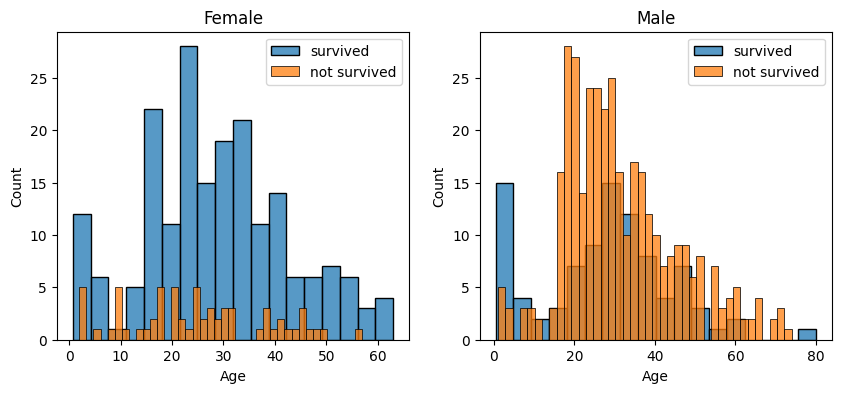

In [8]:
# gênero e idade
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = train_val[train_val['Sex']=='female']
men = train_val[train_val['Sex']=='male']
ax = sns.histplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.histplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.histplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.histplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
ax.set_title('Male')

<Axes: xlabel='Pclass', ylabel='Survived'>

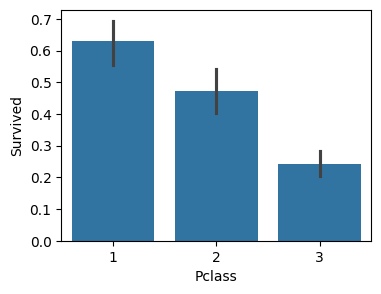

In [9]:
# Pclass
plt.figure(figsize=(4, 3))
sns.barplot(x='Pclass', y='Survived', data=train_val)

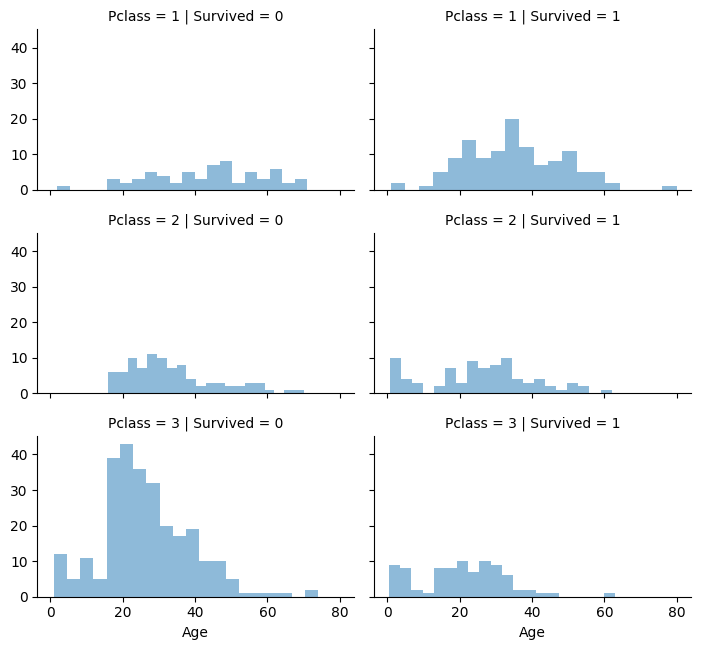

In [10]:
# Pclass
grid = sns.FacetGrid(train_val, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

d:\bre_p\bre_p\Documents\titanic_shit\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\bre_p\bre_p\Documents\titanic_shit\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)
d:\bre_p\bre_p\Documents\titanic_shit\.venv\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#1f77b4'` for the same effect.

  func(*plot_args, **plot_kwargs)


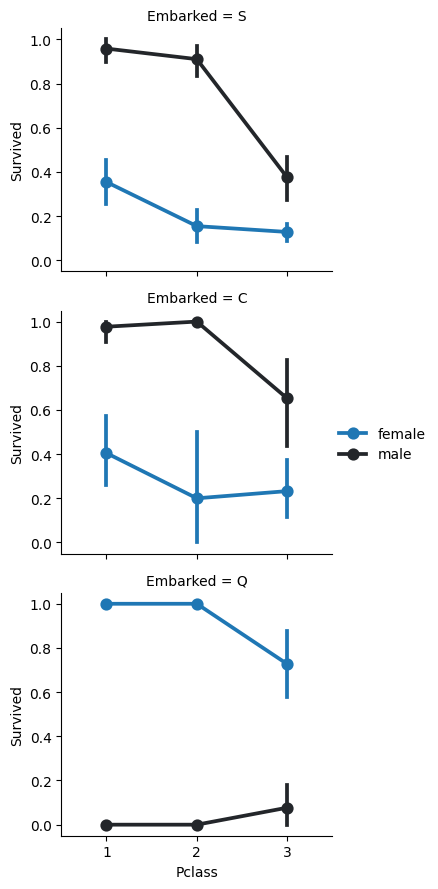

In [11]:
# relação entre o porto de embarcação e o seu impacto nas taxas de sobrevivência
FacetGrid = sns.FacetGrid(train_val, row='Embarked', height=3, aspect=1.2)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None, order=None, hue_order=None)
FacetGrid.add_legend()

In [12]:
# juntando duas features em uma, que seriam sibsp e parch, para "relatives"
data = [train_val, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 1
    dataset['alone'] = dataset['alone'].astype(int)
train_val['alone'].value_counts()

alone
1    537
0    354
Name: count, dtype: int64

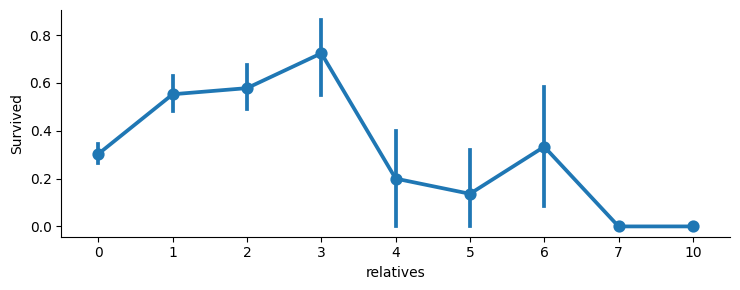

In [13]:
# dando plot para descobrir a relação entre o número de parentes e a taxa de sobrevivência

axes = sns.FacetGrid(train_val, aspect = 2.5)
axes.map(sns.pointplot, 'relatives', 'Survived', palette=None, order=None, hue_order=None)


### Passo 4: Limpeza dos Dados

In [14]:
# tirando a coluna "PassengerId" já que não possui relação com a taxa de sobrevivência
passenger_id = test_df.PassengerId
train_val = train_val.drop(['PassengerId'], axis=1)

##### Tratando dados perdidos

In [15]:
train_val.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives', 'alone'],
      dtype=object)

In [16]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'relatives', 'alone'],
      dtype=object)

In [17]:
# Cabin para Deck 
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_val, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)

train_val = train_val.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [18]:
# Idade
data = [train_val, test_df]

for dataset in data:
    mean = train_val["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # gerando números aleatórios entre a média, o desvio padrão e o nulo
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # preencher valores NaN com os valores randômicos obtidos
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_val["Age"].astype(int)
train_val["Age"].isnull().sum()

0

In [19]:
# Embarked
train_val['Embarked'].describe()


count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [20]:
# Embarked
common_value = 'S'
data = [train_val, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

##### Convertendo as Features no tipo correto e manuseável dos dados

In [21]:
train_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    int32  
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  alone      891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


In [22]:
# fare
data = [train_val, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)


In [23]:
# Nome
data = [train_val, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extraindo títulos
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # substituindo os títulos por "Rare" ou por algum mais comum
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convertendo os títulos para números
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset['Title'].fillna(0)
# train_val = train_val.drop(['Name'], axis=1)
# test_df = test_df.drop(['Name'], axis=1)

In [24]:
train_val.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71,C,1,0,3,3
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53,S,1,0,3,3
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8,S,0,1,8,1
5,0,3,"Moran, Mr. James",male,42,0,0,330877,8,Q,0,1,8,1
6,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51,S,0,1,5,1
7,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21,S,4,0,8,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11,S,2,0,8,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30,C,1,0,8,3


In [25]:
# Gênero
genders = {"male": 0, "female": 1}
data = [train_val, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
# Ticket
train_val['Ticket'].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [27]:
train_val = train_val.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

In [28]:
# Embarked
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_val, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Passo 5: Criando categorias

In [29]:
# criando grupos de idade ('Age')
data = [train_val, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

train_val['Age'].value_counts()

Age
6    161
4    157
5    146
3    141
2    124
1     94
0     68
Name: count, dtype: int64

In [30]:
# Fare
train_val.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,7,0,1,0,8,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,71,1,1,0,3,3
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,7,0,0,1,8,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,53,0,1,0,3,3
4,0,3,"Allen, Mr. William Henry",0,5,0,0,8,0,0,1,8,1
5,0,3,"Moran, Mr. James",0,6,0,0,8,2,0,1,8,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,51,0,0,1,5,1
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,21,0,4,0,8,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,11,0,2,0,8,3
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,30,1,1,0,8,3


In [31]:
# criando grupos de preço de passagem ('Fare')
data = [train_val, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### Passo 6: Criando novas Features

In [32]:
sorted(train_val.columns.values)

['Age',
 'Deck',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'Pclass',
 'Sex',
 'SibSp',
 'Survived',
 'Title',
 'alone',
 'relatives']

In [33]:
sorted(test_df.columns.values)

['Age',
 'Deck',
 'Embarked',
 'Fare',
 'Name',
 'Parch',
 'PassengerId',
 'Pclass',
 'Sex',
 'SibSp',
 'Title',
 'alone',
 'relatives']

In [34]:
# Idade baseada na Classe
data = [train_val, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age'] * dataset['Pclass']

In [35]:
# Preço de Passagem pela Pessoa
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

train_val.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,alone,Deck,Title,Age_Class,Fare_Per_Person
0,0,3,"Braund, Mr. Owen Harris",0,2,1,0,0,0,1,0,8,1,6,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,5,1,0,3,1,1,0,3,3,5,1
2,1,3,"Heikkinen, Miss. Laina",1,3,0,0,0,0,0,1,8,2,9,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,5,1,0,3,0,1,0,3,3,5,1
4,0,3,"Allen, Mr. William Henry",0,5,0,0,1,0,0,1,8,1,15,1
5,0,3,"Moran, Mr. James",0,6,0,0,1,2,0,1,8,1,18,1
6,0,1,"McCarthy, Mr. Timothy J",0,6,0,0,3,0,0,1,5,1,6,3
7,0,3,"Palsson, Master. Gosta Leonard",0,0,3,1,2,0,4,0,8,4,0,0
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,3,0,2,1,0,2,0,8,3,9,0
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,1,1,0,2,1,1,0,8,3,2,1


### Passo 7: Criando Modelos de Machine Learning

In [33]:
# X_train = train_val.drop("Survived", axis=1)
# Y_train = train_val["Survived"]
# X_test  = test_df.drop("PassengerId", axis=1).copy()

##### Random Forest

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=100)
# random_forest.fit(X_train, Y_train)

# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)
# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

##### SGD

In [ ]:
# sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
# sgd.fit(X_train, Y_train)
# Y_pred = sgd.predict(X_test)

# sgd.score(X_train, Y_train)

# acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

##### Random Forest in Other Tests

In [36]:
train_val.columns.values

array(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person'], dtype=object)

In [37]:
test_df.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'relatives', 'alone', 'Deck', 'Title',
       'Age_Class', 'Fare_Per_Person'], dtype=object)

In [38]:
sorted(train_val.Deck.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [39]:
sorted(test_df.Deck.unique())

[1, 2, 3, 4, 5, 6, 7, 8]

In [40]:
test_df.drop(columns=["PassengerId"], inplace=True)

In [41]:
train_val.drop(columns = ["Survived"], inplace=True)

In [42]:
train_val.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'], dtype=object)

In [43]:
test_df.columns.values

array(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'relatives', 'alone', 'Deck', 'Title', 'Age_Class',
       'Fare_Per_Person'], dtype=object)

In [44]:
train_val.shape

(891, 14)

In [45]:
test_df.shape

(418, 14)

In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_values = ["Title", "Pclass", "Embarked", "Deck", "Fare_Per_Person", "Age_Class", "relatives"]

# Criar o transformador de colunas
column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_values)
    ],
    remainder='passthrough'
)

# Ajustar e transformar os dados de treinamento
train_val_encoded = column_transformer.fit_transform(train_val)

# Transformar os dados de teste
test_encoded = column_transformer.transform(test_df)

# Obter os nomes das colunas após a transformação
encoded_column_names = column_transformer.named_transformers_['onehot'].get_feature_names_out(categorical_values)

# Criar dataframes com as variáveis dummy e outras colunas
train_val_encoded_df = pd.DataFrame(train_val_encoded, columns=list(encoded_column_names) + list(train_val.columns.drop(categorical_values)))
test_encoded_df = pd.DataFrame(test_encoded, columns=list(encoded_column_names) + list(test_df.columns.drop(categorical_values)))

In [47]:
# train_val = pd.get_dummies(train_val, columns=["Title", "Pclass", "Embarked", "Deck", "Fare_Per_Person", "Age_Class", "relatives"], drop_first=False)

In [48]:
# test_df = pd.get_dummies(test_df, columns=["Title", "Pclass", "Embarked", "Deck", "Fare_Per_Person", "Age_Class", "relatives"], drop_first=False)

In [49]:
train_val_encoded_df.columns.values

array(['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5',
       'Deck_6', 'Deck_7', 'Deck_8', 'Fare_Per_Person_0',
       'Fare_Per_Person_1', 'Fare_Per_Person_2', 'Fare_Per_Person_3',
       'Fare_Per_Person_4', 'Fare_Per_Person_5', 'Age_Class_0',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Age_Class_5', 'Age_Class_6', 'Age_Class_8', 'Age_Class_9',
       'Age_Class_10', 'Age_Class_12', 'Age_Class_15', 'Age_Class_18',
       'relatives_0', 'relatives_1', 'relatives_2', 'relatives_3',
       'relatives_4', 'relatives_5', 'relatives_6', 'relatives_7',
       'relatives_10', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'alone'], dtype=object)

In [50]:
test_encoded_df.columns.values

array(['Title_1', 'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2',
       'Deck_0', 'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5',
       'Deck_6', 'Deck_7', 'Deck_8', 'Fare_Per_Person_0',
       'Fare_Per_Person_1', 'Fare_Per_Person_2', 'Fare_Per_Person_3',
       'Fare_Per_Person_4', 'Fare_Per_Person_5', 'Age_Class_0',
       'Age_Class_1', 'Age_Class_2', 'Age_Class_3', 'Age_Class_4',
       'Age_Class_5', 'Age_Class_6', 'Age_Class_8', 'Age_Class_9',
       'Age_Class_10', 'Age_Class_12', 'Age_Class_15', 'Age_Class_18',
       'relatives_0', 'relatives_1', 'relatives_2', 'relatives_3',
       'relatives_4', 'relatives_5', 'relatives_6', 'relatives_7',
       'relatives_10', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'alone'], dtype=object)

In [51]:
train_val_encoded_df.drop(["Name", "Fare"], axis=1, inplace=True)
test_encoded_df.drop(["Name", "Fare"], axis=1, inplace=True)

In [52]:
train_val_encoded_df.head()

,Title_1,Title_2,Title_3,Title_4,Title_5,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,...,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10,Sex,Age,SibSp,Parch,alone
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,2,1,0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1,5,1,0,0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,3,0,0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,5,1,0,0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,5,0,0,1


In [53]:
train_val_encoded_df = pd.concat([train_val_encoded_df[["Age", "Sex","SibSp","Parch"]], train_val_encoded_df.loc[:,"alone":]], axis=1)
test_encoded_df = pd.concat([test_encoded_df[["Age", "Sex"]], test_encoded_df.loc[:,"SibSp":]], axis=1)

In [55]:
x = train_val_encoded_df
y = train_val_encoded_df['Survived']

KeyError: 'Survived'

In [100]:
x_treino, x_val, y_treino, y_val = train_test_split(x, y, test_size=0.2, random_state=0)

NameError: name 'x' is not defined

In [42]:
len(x_treino)

596

In [43]:
len(x_val)

295

In [44]:
train_val_encoded_df.sample(5)

,Survived,Age,Sex,SibSp,Parch,alone,Title_1,Title_2,Title_3,Title_4,...,Age_Class_18,relatives_0,relatives_1,relatives_2,relatives_3,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10
874,1,4,1,1,0,0,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
499,0,3,0,0,0,1,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
209,1,5,0,0,0,1,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
54,0,6,0,0,1,0,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
203,0,6,0,0,0,1,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False


In [45]:
x_treino.shape, x_val.shape, y_treino.shape, y_val.shape

((596, 53), (295, 53), (596,), (295,))

In [46]:
headers = x_treino.columns

x_treino.head()

,Age,Sex,SibSp,Parch,alone,Title_1,Title_2,Title_3,Title_4,Title_5,...,Age_Class_18,relatives_0,relatives_1,relatives_2,relatives_3,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10
242,4,0,0,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
344,5,0,0,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
170,6,0,0,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
187,6,0,0,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
800,5,0,0,0,1,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [47]:
train_val_encoded_df.dtypes

Survived             int64
Age                  int32
Sex                  int64
SibSp                int64
Parch                int64
alone                int32
Title_1               bool
Title_2               bool
Title_3               bool
Title_4               bool
Title_5               bool
Pclass_1              bool
Pclass_2              bool
Pclass_3              bool
Embarked_0            bool
Embarked_1            bool
Embarked_2            bool
Deck_0                bool
Deck_1                bool
Deck_2                bool
Deck_3                bool
Deck_4                bool
Deck_5                bool
Deck_6                bool
Deck_7                bool
Deck_8                bool
Fare_Per_Person_0     bool
Fare_Per_Person_1     bool
Fare_Per_Person_2     bool
Fare_Per_Person_3     bool
Fare_Per_Person_4     bool
Fare_Per_Person_5     bool
Age_Class_0           bool
Age_Class_1           bool
Age_Class_2           bool
Age_Class_3           bool
Age_Class_4           bool
A

In [48]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()

x_treino = std_scale.fit_transform(x_treino)
x_val = std_scale.fit_transform(x_val)

In [49]:
import pandas as pd
pd.DataFrame(x_treino, columns=headers).head()

,Age,Sex,SibSp,Parch,alone,Title_1,Title_2,Title_3,Title_4,Title_5,...,Age_Class_18,relatives_0,relatives_1,relatives_2,relatives_3,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10
0,0.288365,-0.724083,-0.455235,-0.469509,0.803996,0.832575,-0.499476,-0.405046,-0.226156,-0.143346,...,-0.222027,0.803996,-0.462438,-0.346844,-0.200349,-0.137126,-0.143346,-0.123823,-0.071127,-0.109016
1,0.825444,-0.724083,-0.455235,-0.469509,0.803996,0.832575,-0.499476,-0.405046,-0.226156,-0.143346,...,-0.222027,0.803996,-0.462438,-0.346844,-0.200349,-0.137126,-0.143346,-0.123823,-0.071127,-0.109016
2,1.362523,-0.724083,-0.455235,-0.469509,0.803996,0.832575,-0.499476,-0.405046,-0.226156,-0.143346,...,-0.222027,0.803996,-0.462438,-0.346844,-0.200349,-0.137126,-0.143346,-0.123823,-0.071127,-0.109016
3,1.362523,-0.724083,-0.455235,-0.469509,0.803996,0.832575,-0.499476,-0.405046,-0.226156,-0.143346,...,-0.222027,0.803996,-0.462438,-0.346844,-0.200349,-0.137126,-0.143346,-0.123823,-0.071127,-0.109016
4,0.825444,-0.724083,-0.455235,-0.469509,0.803996,0.832575,-0.499476,-0.405046,-0.226156,-0.143346,...,-0.222027,0.803996,-0.462438,-0.346844,-0.200349,-0.137126,-0.143346,-0.123823,-0.071127,-0.109016


In [50]:
train_val_encoded_df.sample(5)

,Survived,Age,Sex,SibSp,Parch,alone,Title_1,Title_2,Title_3,Title_4,...,Age_Class_18,relatives_0,relatives_1,relatives_2,relatives_3,relatives_4,relatives_5,relatives_6,relatives_7,relatives_10
423,0,4,1,1,1,0,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
204,1,1,0,0,0,1,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
254,0,6,1,0,2,0,False,False,True,False,...,True,False,False,True,False,False,False,False,False,False
78,1,0,0,0,2,0,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
377,0,3,0,0,2,0,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [51]:
from sklearn.metrics import mean_absolute_error, accuracy_score

## call on the model object
logreg = LogisticRegression(solver='liblinear',
                            penalty= 'l1',random_state = 42
                            )

logreg.fit(x_treino, y_treino)

## Once the model is trained we want to find out how well the model is performing, so we test the model. 
## we use "x_teste" portion of the data(this data was not used to fit the model) to predict model outcome. 
y_pred = logreg.predict(x_val)

In [89]:
x_treino.shape

(596, 53)

#### Novo teste sobre Matriz de Confusão - Artigo Kaggle

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confusion matrix
pd.DataFrame(confusion_matrix(y_val,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )


,Predicted Not-Survived,Predicted Survived
Not-Survived,158,26
Survived,28,83


##### Primeira Tentativa:
        - VP: 87
        - VN: 153
        - FP: 31
        - FN: 24

In [53]:
accuracy_score(y_val, y_pred)

0.8169491525423729

In [54]:
from sklearn.metrics import recall_score
recall_score(y_val, y_pred)

0.7477477477477478

In [55]:
from sklearn.metrics import precision_score
precision_score(y_val, y_pred)

0.7614678899082569

In [56]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       184
           1       0.76      0.75      0.75       111

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



#### Usando Cross-validation nesse modelo

In [57]:
sc = std_scale

In [58]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0) # run model 10x with 60/30 split intentionally leaving out 10%
## Using standard scale for the whole dataset.

## saving the feature names for decision tree display
column_names = x.columns

x = sc.fit_transform(x)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), x, y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.80717489 0.82511211 0.79820628 0.83856502 0.81165919 0.79372197
 0.80717489 0.87443946 0.81165919 0.8206278 ]
Mean Cross-Validation accuracy score: 0.81883


#### Usando Grid-Search

In [59]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
## C_vals is the alpha value of lasso and ridge regression(as alpha increases the model complexity decreases,)
## remember effective alpha scores are 0<alpha<infinity 
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(x, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l2']},
             scoring='accuracy')

In [60]:
## Getting the best of everything. 
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8192825112107623
{'C': 6, 'penalty': 'l2'}
LogisticRegression(C=6)


In [61]:
logreg_grid = grid.best_estimator_
logreg_grid.score(x,y)

0.8484848484848485

#### Treinando com outros modelos

##### K-Nearest Neighbor

In [62]:
## Importing the model. 
from sklearn.neighbors import KNeighborsClassifier
## calling on the model oject. 
knn = KNeighborsClassifier(metric='minkowski', p=2)
## knn classifier works by doing euclidian distance 


## doing 10 fold staratified-shuffle-split cross validation 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=2)

accuracies = cross_val_score(knn, x, y, cv = cv, scoring='accuracy')
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),3)))

Cross-Validation accuracy scores:[0.76233184 0.76681614 0.7264574  0.77130045 0.80717489 0.75784753
 0.78026906 0.78026906 0.73991031 0.73542601]
Mean Cross-Validation accuracy score: 0.763


In [63]:
## Search for an optimal value of k for KNN.
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv = cv, scoring = 'accuracy')
    k_scores.append(scores.mean())
print("Accuracy scores are: {}\n".format(k_scores))
print ("Mean accuracy score: {}".format(np.mean(k_scores)))

Accuracy scores are: [0.726457399103139, 0.7354260089686099, 0.7547085201793722, 0.7556053811659194, 0.7627802690582959, 0.7551569506726458, 0.7627802690582961, 0.7600896860986548, 0.7641255605381166, 0.7582959641255604, 0.7609865470852017, 0.7609865470852017, 0.75695067264574, 0.7600896860986548, 0.758744394618834, 0.7569506726457399, 0.7573991031390135, 0.7529147982062779, 0.7573991031390135, 0.7582959641255607, 0.7582959641255606, 0.7596412556053811, 0.7596412556053812, 0.7565022421524663, 0.7560538116591928, 0.7551569506726458, 0.7560538116591928, 0.7524663677130045, 0.75695067264574, 0.7515695067264574]

Mean accuracy score: 0.7559491778774291


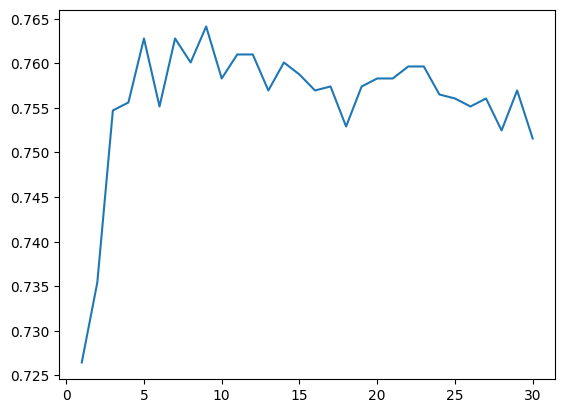

In [64]:
plt.plot(k_range, k_scores)

##### Usando Grid-Search no classificador KNN 

In [65]:
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
grid = GridSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1)
## Fitting the model. 
grid.fit(x, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 31),
                         'weights': ['uniform', 'distance']},
             verbose=False)

In [66]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8003731343283581
{'n_neighbors': 29, 'weights': 'distance'}
KNeighborsClassifier(n_neighbors=29, weights='distance')


In [67]:
### Using the best parameters from the grid-search.
knn_grid= grid.best_estimator_
knn_grid.score(x, y)

0.9248035914702581

##### Usando o RandomizedSearchCV (parecido com o Grid-Search, porém mais rápido)

In [68]:
from sklearn.model_selection import RandomizedSearchCV
## trying out multiple values for k
k_range = range(1,31)
## 
weights_options=['uniform','distance']
# 
param = {'n_neighbors':k_range, 'weights':weights_options}
## Using startifiedShufflesplit. 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30)
# estimator = knn, param_grid = param, n_jobs = -1 to instruct scikit learn to use all available processors. 
## for RandomizedSearchCV, 
grid = RandomizedSearchCV(KNeighborsClassifier(), param,cv=cv,verbose = False, n_jobs=-1, n_iter=40)
## Fitting the model. 
grid.fit(x,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   estimator=KNeighborsClassifier(), n_iter=40, n_jobs=-1,
                   param_distributions={'n_neighbors': range(1, 31),
                                        'weights': ['uniform', 'distance']},
                   verbose=False)

In [69]:
print (grid.best_score_)
print (grid.best_params_)
print(grid.best_estimator_)

0.7787313432835821
{'weights': 'distance', 'n_neighbors': 29}
KNeighborsClassifier(n_neighbors=29, weights='distance')


In [70]:
### Using the best parameters from the grid-search.
knn_ran_grid = grid.best_estimator_
knn_ran_grid.score(x,y)

0.9248035914702581

##### Classificador de Árvore de Decisão

In [71]:
from sklearn.tree import DecisionTreeClassifier
max_depth = range(1,30)
max_feature = [21,22,23,24,25,26,28,29,30,'sqrt']
criterion=["entropy", "gini"]

param = {'max_depth':max_depth, 
         'max_features':max_feature, 
         'criterion': criterion}
grid = GridSearchCV(DecisionTreeClassifier(), 
                                param_grid = param, 
                                 verbose=False, 
                                 cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
                                n_jobs = -1)
grid.fit(x, y)

GridSearchCV(cv=StratifiedKFold(n_splits=20, random_state=15, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(1, 30),
                         'max_features': [21, 22, 23, 24, 25, 26, 28, 29, 30,
                                          'sqrt']},
             verbose=False)

In [72]:
print( grid.best_params_)
print (grid.best_score_)
print (grid.best_estimator_)

{'criterion': 'gini', 'max_depth': 4, 'max_features': 24}
0.8374242424242425
DecisionTreeClassifier(max_depth=4, max_features=24)


In [73]:
dectree_grid = grid.best_estimator_
## using the best found hyper paremeters to get the score. 
dectree_grid.score(x,y)

0.8338945005611672

##### Adicionando e Calculando Importância de Feature

In [74]:
## feature importance
feature_importances = pd.DataFrame(dectree_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.604006
Pclass_2,0.085622
Deck_8,0.068438
Pclass_1,0.066557
SibSp,0.051571
Embarked_0,0.034327
Age_Class_0,0.029229
Title_1,0.020852
Fare_Per_Person_3,0.017983
Age,0.009197


#### Classificador de Random Forest

In [75]:
n_estimators = [140,145,150,155,160]
max_depth = range(1,10)
criterions = ['gini', 'entropy']
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)


parameters = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'criterion': criterions
              }
grid = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160]})

In [76]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8369402985074625
{'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 140}
RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=140)


In [77]:
rf_grid = grid.best_estimator_
rf_grid.score(x,y)

0.867564534231201

In [78]:
from sklearn.metrics import classification_report
# Print classification report for y_test
print(classification_report(y_val, y_pred, labels=rf_grid.classes_))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       184
           1       0.76      0.75      0.75       111

    accuracy                           0.82       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.82      0.82      0.82       295



##### Calculando Importância de Features Novamente

In [79]:
## feature importance
feature_importances = pd.DataFrame(rf_grid.feature_importances_,
                                   index = column_names,
                                    columns=['importance'])
feature_importances.sort_values(by='importance', ascending=False).head(10)

,importance
Sex,0.166418
Title_1,0.152680
Title_2,0.071935
Title_3,0.064900
Pclass_3,0.057260
Deck_8,0.043149
Pclass_1,0.039286
SibSp,0.036678
Age,0.034597
Parch,0.019634


#### Introduzindo o BaggingClassifier

    - Irá separar os dados de treino para usá-los para treinamento dos modelos, sendo que após isso irá realizar a média desses modelos para juntá-los novamente.

In [80]:
from sklearn.ensemble import BaggingClassifier

n_estimators = [10,30,50,70,80,150,160, 170,175,180,185]

cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators, }

grid = GridSearchCV(BaggingClassifier(estimator = None, ## If None, then the base estimator is a decision tree.
                                      bootstrap_features=False),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(x,y) 

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=15, test_size=0.3,
            train_size=None),
             estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [10, 30, 50, 70, 80, 150, 160, 170,
                                          175, 180, 185]})

In [81]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8242537313432836
{'n_estimators': 50}
BaggingClassifier(n_estimators=50)


In [82]:
bagging_grid = grid.best_estimator_
bagging_grid.score(x,y)

0.9248035914702581

#### Usando um Classificador de Votação

In [83]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(estimators=[
    ('lr_grid', logreg_grid),
    ('random_forest', rf_grid),
    ('decision_tree_grid',dectree_grid),
    ('knn_classifier', knn_grid),
#     ('XGB_Classifier', XGBClassifier),
    ('bagging_classifier', bagging_grid),
],voting='hard')

#voting_classifier = voting_classifier.fit(train_x,train_y)
voting_classifier = voting_classifier.fit(x,y)

In [84]:
y_pred = voting_classifier.predict(x_val)
voting_acc = round(accuracy_score(y_pred, y_val), 3)
print(voting_acc)

0.885


### Fazendo Submit

In [85]:
all_models = [logreg_grid,
              knn_grid, 
              knn_ran_grid,
              dectree_grid,
              rf_grid,
              bagging_grid,
              voting_classifier]

c = {}
for i in all_models:
    a = i.predict(x_val)
    b = accuracy_score(a, y_val)
    c[i] = b

In [94]:
x_treino.shape

(596, 53)

In [88]:
test_encoded_df.shape

(418, 52)

In [87]:
test_encoded_df.columns.values

array(['Age', 'Sex', 'SibSp', 'Parch', 'alone', 'Title_1', 'Title_2',
       'Title_3', 'Title_4', 'Title_5', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Deck_1',
       'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6', 'Deck_7',
       'Deck_8', 'Fare_Per_Person_0', 'Fare_Per_Person_1',
       'Fare_Per_Person_2', 'Fare_Per_Person_3', 'Fare_Per_Person_4',
       'Fare_Per_Person_5', 'Age_Class_0', 'Age_Class_1', 'Age_Class_2',
       'Age_Class_3', 'Age_Class_4', 'Age_Class_5', 'Age_Class_6',
       'Age_Class_8', 'Age_Class_9', 'Age_Class_10', 'Age_Class_12',
       'Age_Class_15', 'Age_Class_18', 'relatives_0', 'relatives_1',
       'relatives_2', 'relatives_3', 'relatives_4', 'relatives_5',
       'relatives_6', 'relatives_7', 'relatives_10'], dtype=object)

In [91]:
train_val_encoded_df.columns.values

array(['Survived', 'Age', 'Sex', 'SibSp', 'Parch', 'alone', 'Title_1',
       'Title_2', 'Title_3', 'Title_4', 'Title_5', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Deck_0',
       'Deck_1', 'Deck_2', 'Deck_3', 'Deck_4', 'Deck_5', 'Deck_6',
       'Deck_7', 'Deck_8', 'Fare_Per_Person_0', 'Fare_Per_Person_1',
       'Fare_Per_Person_2', 'Fare_Per_Person_3', 'Fare_Per_Person_4',
       'Fare_Per_Person_5', 'Age_Class_0', 'Age_Class_1', 'Age_Class_2',
       'Age_Class_3', 'Age_Class_4', 'Age_Class_5', 'Age_Class_6',
       'Age_Class_8', 'Age_Class_9', 'Age_Class_10', 'Age_Class_12',
       'Age_Class_15', 'Age_Class_18', 'relatives_0', 'relatives_1',
       'relatives_2', 'relatives_3', 'relatives_4', 'relatives_5',
       'relatives_6', 'relatives_7', 'relatives_10'], dtype=object)

In [86]:
test_prediction = (max(c, key=c.get)).predict(test_encoded_df)
submission = pd.DataFrame({
        "PassengerId": passenger_id,
        "Survived": test_prediction
    })

submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic1_submission.csv", index=False)

d:\bre_p\bre_p\Documents\titanic_shit\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but BaggingClassifier was fitted without feature names
  warnings.warn(


ValueError: X has 52 features, but BaggingClassifier is expecting 53 features as input.

In [64]:
# submission.to_csv("titanic1_submission.csv", index=False)

# sub = pd.Series(y_pred, index=test_df['PassengerId'], name='Survived')
# sub.shape

KeyError: 'PassengerId'

### Começo do Artigo do Mario Filho

In [ ]:
# modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
# modelo.fit(x_treino, y_treino)


In [ ]:
# p = modelo.predict(x_val)

In [ ]:
# np.mean(y_val == p)

In [ ]:
# p = (x_val['Sex_binario']==1).astype(np.int64)
# np.mean(y_val == p)

##### Validação Cruzada

In [ ]:
# x_falso

In [ ]:
# from sklearn.model_selection import KFold

In [ ]:
# # kf = KFold(3, shuffle=True, random_state=0)
# for linhas_treino, linhas_val in kf.split(x_falso):
#     print("Treino:", linhas_treino)
#     print("Valid:", linhas_val)
#     print()

In [ ]:
# resultados = []
# for rep in range(10):
#     print("Rep:", rep)
#     kf = KFold(5, shuffle=True, random_state=rep)
    
#     for linhas_treino, linhas_val in kf.split(x):
#         print("Treino:", linhas_treino.shape[0])
#         print("Val:", linhas_val.shape[0])

#         x_treino, x_val = x.iloc[linhas_treino], x.iloc[linhas_val]
#         y_treino, y_val = y.iloc[linhas_treino], y.iloc[linhas_val]

#         modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
#         modelo.fit(x_treino, y_treino)

#         p = modelo.predict(x_val)

#         acc = np.mean(y_val == p)
#         resultados.append(acc)
#         print("Acc:", acc)
#         print()
#         #print(X_treino.head())
#         #print()

In [ ]:
# %pylab inline

In [ ]:
# pylab.hist(resultados)

In [ ]:
# np.mean(resultados)

##### Logistic Regression

In [ ]:
# logreg = LogisticRegression()
# logreg.fit(X_train, Y_train)

# Y_pred = logreg.predict(X_test)

# acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

##### K Nearest Neighbor

In [ ]:
# knn = KNeighborsClassifier(n_neighbors = 3)
# knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
# acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

##### Gaussian Naive Bayes

In [ ]:
# gaussian = GaussianNB()
# gaussian.fit(X_train, Y_train)
# Y_pred = gaussian.predict(X_test)
# acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

##### Perceptron

In [ ]:
# perceptron = Perceptron(max_iter=5)
# perceptron.fit(X_train, Y_train)

# Y_pred = perceptron.predict(X_test)

# acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

##### Linear Support Vector Machine

In [ ]:
# linear_svc = LinearSVC()
# linear_svc.fit(X_train, Y_train)

# Y_pred = linear_svc.predict(X_test)

# acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

##### Decision Tree

In [ ]:
# decision_tree = DecisionTreeClassifier()
# decision_tree.fit(X_train, Y_train)  
# Y_pred = decision_tree.predict(X_test)  
# acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

##### Obtendo os Resultados

In [ ]:
# results = pd.DataFrame({
#     'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
#               'Random Forest', 'Naive Bayes', 'Perceptron'],
#     'Score': [acc_linear_svc, acc_knn, acc_log, 
#               acc_random_forest, acc_gaussian, acc_perceptron, 
#               ]})
# result_df = results.sort_values(by='Score', ascending=False)
# result_df = result_df.set_index('Score')
# result_df.head(9)

In [ ]:
# # K-Fold Cross Validation (para testar o Modelo de Random Forest)
# from sklearn.model_selection import cross_val_score
# rf = RandomForestClassifier(n_estimators=100)
# scores = cross_val_score(rf, X_train, Y_train, cv=10, scoring = "accuracy")
# print("Scores:", scores)
# print("Mean:", scores.mean())
# print("Standard Deviation:", scores.std())

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_val, y_train, y_val = train_test_split(x, y, stratify=y, test_size = 0.20, random_state = 42)

##### Importância de Feature

In [ ]:
# importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
# importances = importances.sort_values('importance',ascending=False).set_index('feature')
# importances.head()

In [ ]:
# importances.plot.bar()

In [ ]:
# train_val  = train_val.drop("alone", axis=1)
# test_df  = test_df.drop("alone", axis=1)

# train_val  = train_val.drop("Parch", axis=1)
# test_df  = test_df.drop("Parch", axis=1)

##### Treinando o modelo novamente

In [ ]:
# random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
# random_forest.fit(X_train, Y_train)
# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

# acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
# print(round(acc_random_forest,2,), "%")

In [ ]:
# print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

### Passo 8: Otimização em Hiperparâmetros

In [ ]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='sqrt', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(X_train, Y_train)
# clf.best_params_


In [ ]:
# random_forest = RandomForestClassifier(criterion = "gini", 
#                                        min_samples_leaf = 1, 
#                                        min_samples_split = 10,   
#                                        n_estimators=100, 
#                                        max_features='sqrt', 
#                                        oob_score=True, 
#                                        random_state=1, 
#                                        n_jobs=-1)

# random_forest.fit(X_train, Y_train)
# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)

# print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

##### Mais avaliação

In [ ]:
# # Matriz de Confusão
# predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)
# confusion_matrix(Y_train, predictions)

In [ ]:
# # Precisão e Sensibilidade
# from sklearn.metrics import precision_score, recall_score

# print("Precision:", precision_score(Y_train, predictions))
# print("Recall:",recall_score(Y_train, predictions))

In [ ]:
# # F-score
# from sklearn.metrics import f1_score
# f1_score(Y_train, predictions)

In [ ]:
# # Precision Recall Curve
# from sklearn.metrics import precision_recall_curve

# # obtendo as probabilidades das medições
# y_scores = random_forest.predict_proba(X_train)
# y_scores = y_scores[:,1]

# precision, recall, threshold = precision_recall_curve(Y_train, y_scores)
# def plot_precision_and_recall(precision, recall, threshold):
#     plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
#     plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
#     plt.xlabel("threshold", fontsize=19)
#     plt.legend(loc="upper right", fontsize=19)
#     plt.ylim([0, 1])

# plt.figure(figsize=(14, 7))
# plot_precision_and_recall(precision, recall, threshold)
# plt.show()

In [ ]:
# # dando plot em Precisão vs Recall (um contra o outro)
# def plot_precision_vs_recall(precision, recall):
#     plt.plot(recall, precision, "g--", linewidth=2.5)
#     plt.ylabel("recall", fontsize=19)
#     plt.xlabel("precision", fontsize=19)
#     plt.axis([0, 1.5, 0, 1.5])

# plt.figure(figsize=(14, 7))
# plot_precision_vs_recall(precision, recall)
# plt.show()

In [ ]:
# # ROC AUC Curve
# from sklearn.metrics import roc_curve
# # calculando as métricas positivas e as métricas negativas
# false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_train, y_scores)
# # dando plot um contra o outro
# def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
#     plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'r', linewidth=4)
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel('False Positive Rate (FPR)', fontsize=16)
#     plt.ylabel('True Positive Rate (TPR)', fontsize=16)

# plt.figure(figsize=(14, 7))
# plot_roc_curve(false_positive_rate, true_positive_rate)
# plt.show()

In [ ]:
# from sklearn.metrics import roc_auc_score
# r_a_score = roc_auc_score(Y_train, y_scores)
# print("ROC-AUC-Score:", r_a_score)

### Passo 9: Criar Submissão

In [ ]:
sub = pd.Series(Y_prediction, index=test_df['PassengerId'], name='Survived')
sub.shape

In [ ]:
sub.to_csv("modelo_titanic_1.csv", header=True)

In [ ]:
sub.head(10)

In [ ]:
sub1 = pd.Series(p, index=test_df['PassengerId'], name='Survived')
sub1.shape